In [3]:
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
from utils.data_loader import load_crime_dataset

import pandas as pd

In [4]:
# Location of stored dataset
dataset_path = Path('../datasets/chicago-crime-data.csv')

if dataset_path.exists():
    print(f"File found: {dataset_path.name}")
else:
    load_crime_dataset()

File found: chicago-crime-data.csv


In [5]:
# Converting result into dataframe
results_df = pd.read_csv(dataset_path)
results_df.head(4)

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,:@computed_region_awaf_s7ux
0,13639616,JH479028,2024-10-23T00:00:00.000,051XX S WOODLAWN AVE,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,False,...,41,26,1185098.0,1871194.0,2024,2024-10-30T15:41:19.000,41.801709,-87.596698,"{'latitude': '41.801709383', 'longitude': '-87...",1.0
1,13640715,JH480350,2024-10-23T00:00:00.000,014XX S RIDGEWAY AVE,4650,OTHER OFFENSE,SEX OFFENDER - FAIL TO REGISTER,APARTMENT,False,False,...,29,26,1151613.0,1892717.0,2024,2024-10-30T15:41:19.000,41.861493,-87.718936,"{'latitude': '41.861493158', 'longitude': '-87...",36.0
2,13644428,JH484973,2024-10-23T00:00:00.000,045XX N CLARENDON AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,3,26,1170091.0,1930547.0,2024,2024-10-30T15:41:19.000,41.964918,-87.650001,"{'latitude': '41.96491786', 'longitude': '-87....",37.0
3,13640484,JH480220,2024-10-23T00:00:00.000,001XX W CERMAK RD,2028,NARCOTICS,POSSESS - SYNTHETIC DRUGS,CTA PLATFORM,True,False,...,33,18,1175994.0,1889765.0,2024,2024-10-30T15:41:19.000,41.852879,-87.629527,"{'latitude': '41.852879013', 'longitude': '-87...",12.0


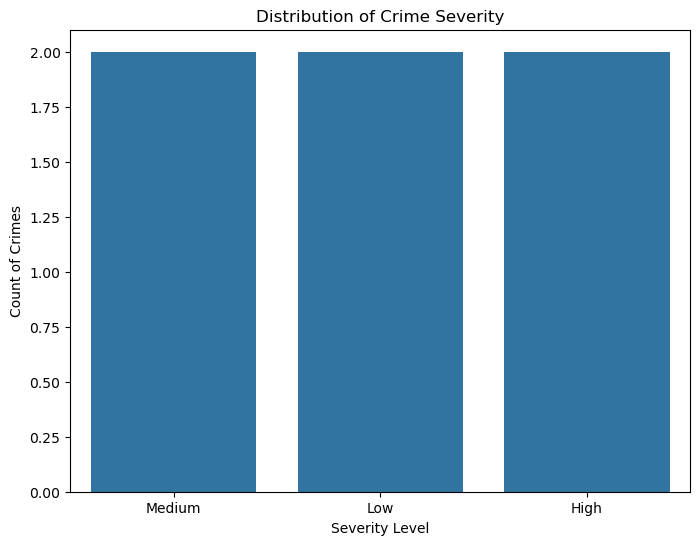

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'primary_type': ['CRIMINAL TRESPASS', 'OTHER OFFENSE', 'OTHER OFFENSE', 'NARCOTICS', 'CRIMINAL TRESPASS', 'NARCOTICS'],
    'fbi_code': ['06', '01', '01', '18', '06', '18'],
}

df = pd.DataFrame(data)

# Define severity levels based on primary crime type (or you can modify to use fbi_code or other criteria)
severity_dict = {
    'NARCOTICS': 'High',
    'CRIMINAL TRESPASS': 'Medium',
    'OTHER OFFENSE': 'Low',
    'SEX OFFENDER - FAIL TO REGISTER': 'High',
    'HARASSMENT BY ELECTRONIC MEANS': 'Low',
    'POSSESS - SYNTHETIC DRUGS': 'High',
}

# Create a new column in the DataFrame for crime severity
df['severity'] = df['primary_type'].map(severity_dict)

# Visualizing the distribution of crime severity
plt.figure(figsize=(8, 6))
sns.countplot(x='severity', data=df)

# Adding labels and title
plt.title('Distribution of Crime Severity')
plt.xlabel('Severity Level')
plt.ylabel('Count of Crimes')
plt.show()

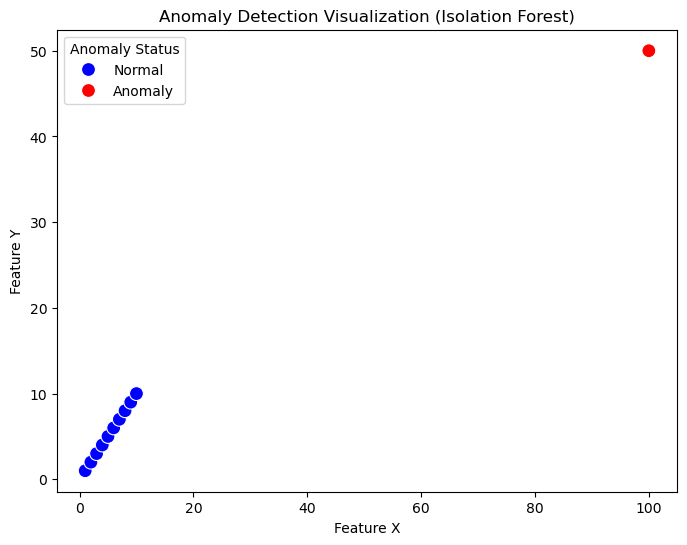

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Sample data (can be replaced with your actual dataset)
data = {
    'x': [1, 2, 3, 4, 5, 6, 100, 7, 8, 9, 10],  # X-axis feature
    'y': [1, 2, 3, 4, 5, 6, 50, 7, 8, 9, 10]    # Y-axis feature
}

df = pd.DataFrame(data)

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.1)  # Set contamination to 0.1 (10% anomalies)
df['anomaly'] = iso_forest.fit_predict(df[['x', 'y']])

# Mark anomalies as -1 and normal points as 1
df['anomaly'] = df['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', hue='anomaly', data=df, palette={'Normal': 'blue', 'Anomaly': 'red'}, s=100)

# Adding labels and title
plt.title('Anomaly Detection Visualization (Isolation Forest)')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend(title='Anomaly Status')
plt.show()

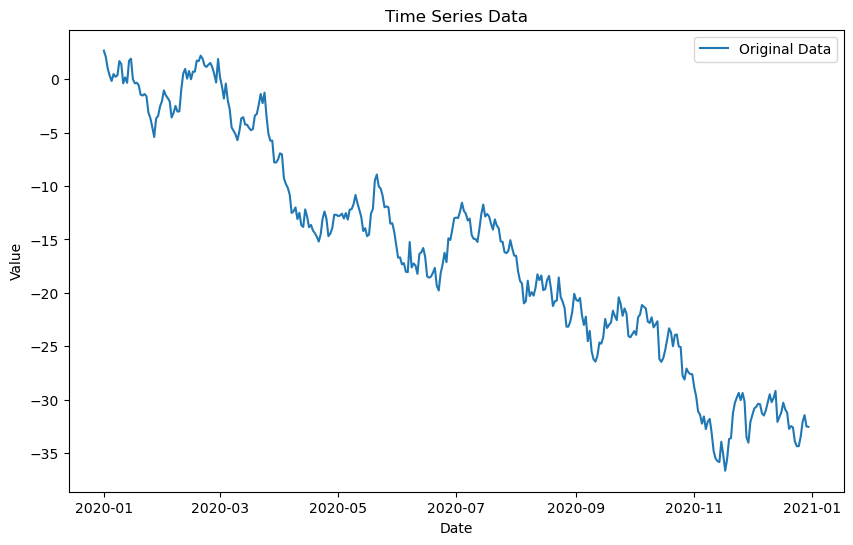

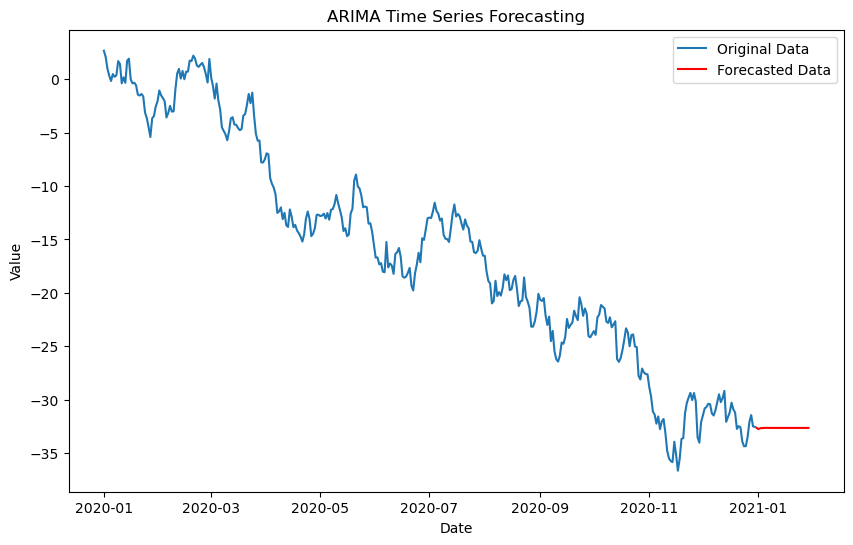

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Simulated time series data (replace this with your actual time series data)
# Create a time series with daily frequency
date_range = pd.date_range(start='2020-01-01', periods=365, freq='D')
data = np.random.randn(365).cumsum()  # Cumulative sum to simulate time series data
df = pd.DataFrame(data, columns=['value'], index=date_range)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], label='Original Data')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Fit ARIMA model
model = ARIMA(df['value'], order=(5, 1, 0))  # ARIMA(p, d, q), where p=5, d=1, q=0
model_fit = model.fit()

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the forecasted values
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], label='Original Data')
plt.plot(forecast_dates, forecast, label='Forecasted Data', color='red')
plt.title('ARIMA Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

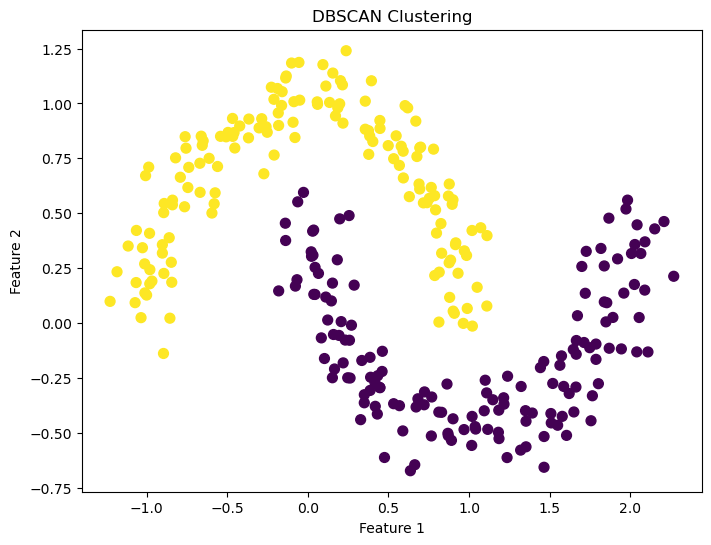

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Simulate data for clustering (replace this with your actual dataset)
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)  # Create moon-shaped data

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)  # eps: maximum distance between points in the same cluster
y_dbscan = dbscan.fit_predict(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', s=50)  # Clustered data points

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()